## Ejercicio 1
Escribir un algoritmo PSO para la maximización de la función:
$$
    y=sin(x)+sin(x^2)
$$
en el intervalo de $0 ≤ x ≤ 10$. Ejecutar el algoritmo en Python con los siguientes parámetros: 

Número de partículas = 2

Máximo número de iteraciones = 30

Coeficientes de aceleración c1 = c2 = 1.49

Peso de inercia w = 0.5


In [80]:
import numpy as np
# from tests.optimizers.test_tolerance import iterations


# función objetivo a maximizar
def f(x):
    return np.sin(x) + np.sin(x**2)  # funcion objetivo: sin(x) + sin(x**2)

# restriccion
def g1(x):
    return 0 <= x <= 10  # restriccion: 0 <= x <= 10

def g2(x):
    return True

# parametros
n_particles = 2  # numero de particulas en el enjambre
max_iterations = 30  # numero máximo de iteraciones para la optimizacion
c1 = c2 = 1.49  # coeficientes de aceleracion
w = 0.5  # Factor de inercia

# inicialización de particulas
x = np.zeros(n_particles)  # matriz para las posiciones de las particulas
v = np.zeros(n_particles)  # matriz para las velocidades de las particulas
pbest = np.zeros(n_particles)  # matriz para los mejores valores personales
pbest_fit = -np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente -infinito)
gbest = 0  # mejor solución global
gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)
gbest_fit_history = [] #va guardando el gbest de cada iteracion

# inicializacion de particulas factibles
for i in range(n_particles):
    while True:  # bucle para asegurar que la particula sea factible
        x[i] = np.random.uniform(0, 10)  # inicializacion posicion aleatoria en el rango [0, 10]
        if g1(x[i]):  # se comprueba si la posicion cumple las restricciones
            break  # Salir del bucle si es factible
    v[i] = np.random.uniform(-1, 1)  # inicializar velocidad aleatoria
    pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
    fit = f(x[i])  # calculo la aptitud de la posicion inicial
    if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
        pbest_fit[i] = fit  # se actualiza el mejor valor personal

# Optimizacion
for J in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
    for i in range(n_particles):
        fit = f(x[i])  # Se calcula la aptitud de la posicion actual
        # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
        if fit > pbest_fit[i] and g1(x[i]):
            pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
            pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
            if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                gbest_fit = fit  # Se actualizar la mejor aptitud global
                gbest = x[i].copy()  # Se actualizar la mejor posicion global
        
        # actualizacion de la velocidad de la particula
        v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
        x[i] += v[i]  # Se actualiza la posicion de la particula

        # se asegura de que la nueva posicion esté dentro de las restricciones
        if not (g1(x[i])):
            # Si la nueva posicion no es válida, revertir a la mejor posicion personal
            x[i] = pbest[i].copy()
    gbest_fit_history.append(gbest_fit) 

# Se imprime la mejor solucion encontrada y también su valor optimo
print(f"Mejor solucion: [{gbest:.4f}]")
print(f"Valor optimo: {gbest_fit}")

Mejor solucion: [1.2947]
Valor optimo: 1.9565720281084897


a. (Valor 0.1 puntos) Transcribir en el informe la solución óptima
encontrada (dominio) y el valor óptimo (imagen).

b. (Valor 0.1 puntos) Indicar la URL del repositorio en donde se encuentra
el algoritmo PSO.

c. (Valor 0.2 puntos) Graficar usando matplotlib la función objetivo y
agregar un punto celeste en donde el algoritmo haya encontrado el valor
máximo. El gráfico debe contener etiquetas en los ejes, leyenda y un
título.

d. (Valor 0.2 puntos) Realizar un gráfico de línea que muestre gbest en
función de las iteraciones realizadas.

e. (Valor 0.4 puntos) Realizar observaciones/comentarios/conclusiones
sobre los resultados obtenidos.

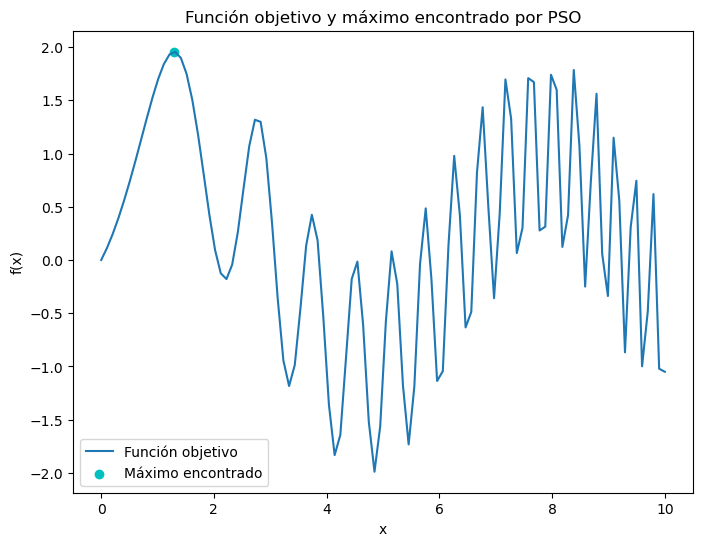

In [81]:
# c.
import matplotlib.pyplot as plt

x_values = np.linspace(0, 10, 100)
y_values = f(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función objetivo')
plt.scatter(gbest, gbest_fit, color='c', label='Máximo encontrado')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función objetivo y máximo encontrado por PSO')
plt.legend()

plt.show()

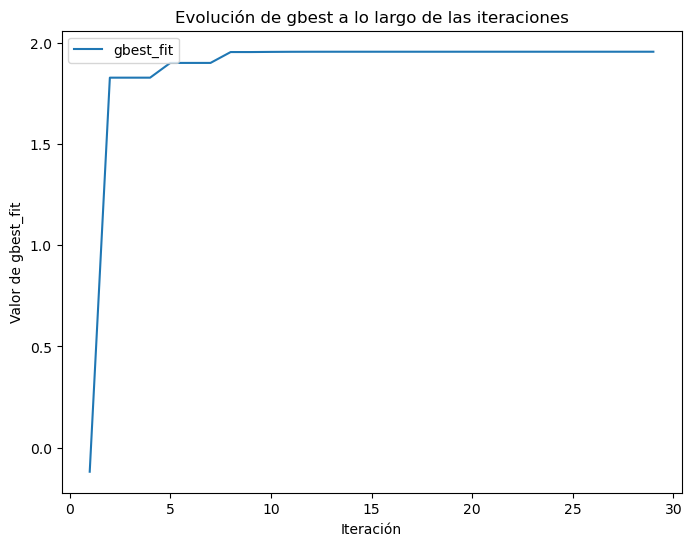

In [82]:
#d.
plt.figure(figsize=(8, 6))
plt.plot(range(max_iterations), gbest_fit_history, label='gbest_fit')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

e. Como se puede ver en el grafico del punto c, el maximo encontrado se aproxima al maximo absoluto de la funcion y. Luego, en el punto d, se puede ver como varia en un principio el valor gbest y luego de la iteracion 15 se estabiliza en el valor 1.29 y ya se queda en ese valor, lo que nos podria estar indicando que encontro el maximo.

## Ejercicio 2
Dada la siguiente función perteneciente a un paraboloide elíptico de la forma:
$$
f(x,y)=(x-a)^2+(y+b)^2
$$
donde, las constantes a y b son valores reales ingresados por el usuario a través de la consola, con intervalos de:
$$
-100<=x<=100, x \in \Re
$$
$$
-100<=y<=100, y \in \Re
$$
$$
-50<=a<=50, a \in \Re
$$
$$
-50<=b<=50, b \in \Re
$$

escribir en Python un algoritmo PSO para la minimización de la función (1) con
los siguientes parámetros: número de partículas = 20, máximo número de
iteraciones = 10, coeficientes de aceleración c1 = c2 = 2, peso de inercia w =
0.7, y que cumpla con las siguientes consignas:

Para este ejercicio cuando se corra el algoritmo, se correra 30 veces y se hara un promedio de las salidas, para estandarizar los resultados y asi poder sacar conclusiones estadisticas. Si esto no se hiciera, cada vez que se corra el algoritmo se tendrian cambios muy grandes en los resultados, haciendo imposible sacar conclusiones.

In [83]:
# función objetivo a maximizar
def f(x):
    return (x[0]-20)**2+(x[1]-30)**2  # funcion objetivo: (x-a)^2+(y-b)^2


# primera restriccion
def g1(x):
    return -100 <= x[0] <= 100  # restriccion: -100 <= x <= 100


# segunda restriccion
def g2(x):
    return -100 <= x[1] <= 100  # restriccion: -100 <= y <= 100


def PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2):

    # inicialización de particulas
    x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
    v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
    pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
    pbest_fit = np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente infinito)
    gbest = np.zeros(n_dimensions)  # mejor solución global
    gbest_fit = np.inf  # mejor aptitud global (inicialmente infinito)
    # gbest_history = np.zeros((n_dimensions,max_iterations)) #va guardando el gbest de cada iteracion
    gbest_fit_history = [] #va guardando el gbest de cada iteracion
    
    # inicializacion de particulas factibles
    for i in range(n_particles):
        while True:  # bucle para asegurar que la particula sea factible
            x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
            if g1(x[i]) and g2(x[i]):  # se comprueba si la posicion cumple las restricciones
                break  # Salir del bucle si es factible
        v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
        pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
        fit = f(x[i])  # calculo la aptitud de la posicion inicial
        if fit < pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
            pbest_fit[i] = fit  # se actualiza el mejor valor personal
    
    # Optimizacion
    for _ in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
        for i in range(n_particles):
            fit = f(x[i])  # Se calcula la aptitud de la posicion actual
            # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
            if fit < pbest_fit[i] and g1(x[i]) and g2(x[i]):
                pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
                pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
                if fit < gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                    gbest_fit = fit  # Se actualizar la mejor aptitud global
                    gbest = x[i].copy()  # Se actualizar la mejor posicion global
    
            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula
    
            # se asegura de que la nueva posicion esté dentro de las restricciones
            if not (g1(x[i]) and g2(x[i])):
                # Si la nueva posicion no es válida, revertir a la mejor posicion personal
                x[i] = pbest[i].copy()
        
        gbest_fit_history.append(gbest) 
    
    # Se imprime la mejor solucion encontrada y también su valor optimo
    # print(f"Mejor solucion: [{gbest[0]:.4f}, {gbest[1]:.4f}]")
    # print(f"Valor optimo: {gbest_fit}")
    return gbest, gbest_fit, gbest_fit_history

# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.7  # Factor de inercia

all_histories2_1 = []
gbest_final_positions2_1 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits2_1 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest2_1, gbest_fit2_1, gbest_history2_1 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories2_1.append(gbest_history2_1)
    gbest_final_positions2_1.append(gbest2_1)  # Guardar la mejor posición final
    gbest_final_fits2_1.append(gbest_fit2_1)  # Guardar la mejor aptitud final
    
gbest_mean2_1 = np.mean(gbest_final_positions2_1, axis=0)
gbest_fit_mean2_1 = np.mean(gbest_final_fits2_1)
gbest_history_mean2_1 = np.mean(all_histories2_1, axis=0)

print("Valor gbest =", gbest_mean2_1)
print("Valor optimo =", gbest_fit_mean2_1)


Valor gbest = [20.46716939 29.81220786]
Valor optimo = 2.329374136039197


a. Transcribir en el informe la solución óptima
encontrada (dominio) y el valor óptimo (imagen).

b. Indicar la URL del repositorio en donde se encuentra
el algoritmo PSO.

c. Graficar usando matplotlib la función objetivo f(x, y)
en 3D y agregar un punto rojo en donde el algoritmo haya encontrado el
valor mínimo. El gráfico debe contener etiquetas en los ejes, leyenda y
un título.

d. Realizar un gráfico de línea que muestre gbest en
función de las iteraciones realizadas.

e. Establecer el coeficiente de inercia w en 0, ejecutar el
algoritmo y realizar observaciones/comentarios/conclusiones sobre los
resultados observados.

f. Reescribir el algoritmo PSO para que cumpla
nuevamente con los ítems A hasta F pero usando la biblioteca pyswarm
(from pyswarm import pso).

g. Realizar observaciones/comentarios/conclusiones
comparando los resultados obtenidos sin pyswarm y con pyswarm.

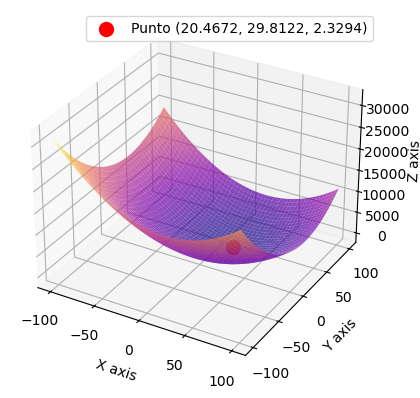

In [84]:
#c. 
# Generar datos de x y y en el rango de -100 a 100
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
x, y = np.meshgrid(x, y)

# Definir la función f(x, y) = (x - a)^2 + (y - b)^2
z = (x - 20) ** 2 + (y - 30) ** 2

# Crear el gráfico 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# Cambiar el ángulo de visión
# ax.view_init(elev=5, azim=10)
# Crear la superficie
ax.plot_surface(x, y, z, cmap='plasma', alpha=0.7)
# Definir un punto
punto_x, punto_y = gbest_mean2_1
punto_z = gbest_fit_mean2_1
# Graficar el punto
ax.scatter(punto_x, punto_y, punto_z, color='red', s=100, label=f'Punto ({punto_x:.4f}, {punto_y:.4f}, {punto_z:.4f})')

# Etiquetas de los ejes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()

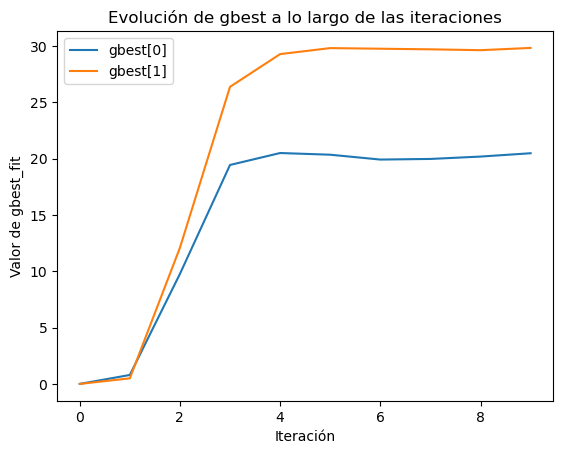

In [85]:
#d.
plt.plot(range(max_iterations), gbest_history_mean2_1[:,0], label='gbest[0]')
plt.plot(range(max_iterations), gbest_history_mean2_1[:,1], label='gbest[1]')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()


In [86]:
#e
# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.  # Factor de inercia

all_histories2_2 = []
gbest_final_positions2_2 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits2_2 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest2_2, gbest_fit2_2, gbest_history2_2 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories2_2.append(gbest_history2_2)
    gbest_final_positions2_2.append(gbest2_2)  # Guardar la mejor posición final
    gbest_final_fits2_2.append(gbest_fit2_2)  # Guardar la mejor aptitud final
    
gbest_mean2_2 = np.mean(gbest_final_positions2_2, axis=0)
gbest_fit_mean2_2 = np.mean(gbest_final_fits2_2)
gbest_history_mean2_2 = np.mean(all_histories2_2, axis=0)

print("Valor gbest =", gbest_mean2_1)
print("Valor optimo =", gbest_fit_mean2_1)

Valor gbest = [20.46716939 29.81220786]
Valor optimo = 2.329374136039197


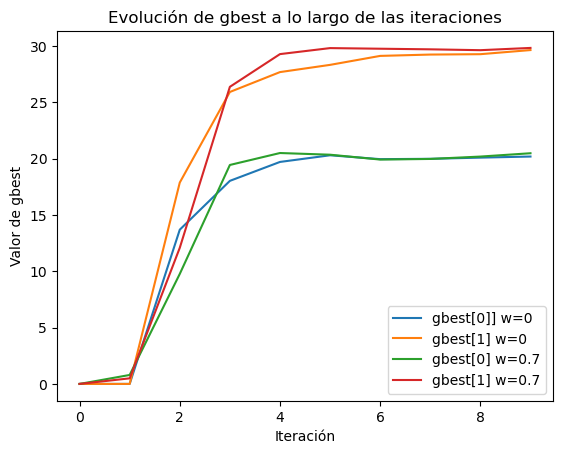

In [87]:
#d.
plt.plot(range(max_iterations), gbest_history_mean2_2[:,0], label='gbest[0]] w=0')
plt.plot(range(max_iterations), gbest_history_mean2_2[:,1], label='gbest[1] w=0')
plt.plot(range(max_iterations), gbest_history_mean2_1[:,0], label='gbest[0] w=0.7')
plt.plot(range(max_iterations), gbest_history_mean2_1[:,1], label='gbest[1] w=0.7')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

Como se puede ver el el grafico, con $\omega = 0$ se aproximan al valor final con una pendiente mayor que con $\omega =0.7$. En parametros generales, pareceria ser que con $\omega =0.7$ el algoritmo se estaria estabilizando mas rapido y estaria funcionando mejor.

In [88]:
#f.
from pyswarm import pso

# Función modificada para registrar el mejor valor global en cada iteración
a = 20  #constante en la funcion, esto se puede hacer para que lo agergue el usuario por consola
b = 30  #constante en la funcion, esto se puede hacer para que lo agergue el usuario por consola

# función objetivo
def funcion_objetivo(x):
    return (x[0]-a)**2+(x[1]-b)**2

lb = [-100, -100]  # limite inf
ub = [100, 100]  # limite sup

# parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
historial_gbest = []

solucion_optima_all = []  # Para guardar el gbest de cada ejecución
valor_optimo_all = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest2_2, gbest_fit2_2, gbest_history2_2 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories2_2.append(gbest_history2_2)
    gbest_final_positions2_2.append(gbest2_2)  # Guardar la mejor posición final
    gbest_final_fits2_2.append(gbest_fit2_2)  # Guardar la mejor aptitud final
    
gbest_mean2_2 = np.mean(gbest_final_positions2_2, axis=0)
gbest_fit_mean2_2 = np.mean(gbest_final_fits2_2)
gbest_history_mean2_2 = np.mean(all_histories2_2, axis=0)
for i in range(times2run):
    solucion_optima, valor_optimo= pso(funcion_objetivo, lb, ub, swarmsize=n_particles, maxiter=max_iterations, debug=True, omega=0.7)
    solucion_optima_all.append(solucion_optima)
    valor_optimo_all.append(valor_optimo)
solucion_optima_mean = np.mean(solucion_optima_all, axis=0)
valor_optimo_mean = np.mean(valor_optimo_all, axis=0)
# Resultados
print("\nSolución óptima (x, y):", solucion_optima_mean)
print("Valor óptimo:", valor_optimo_mean)

No constraints given.
Best after iteration 1: [45.78042807 43.48046078] 846.3532940455452
Best after iteration 2: [45.78042807 43.48046078] 846.3532940455452
New best for swarm at iteration 3: [ 5.29036027 13.80981494] 478.4955930530066
Best after iteration 3: [ 5.29036027 13.80981494] 478.4955930530066
New best for swarm at iteration 4: [ 7.87500952 44.74542378] 364.44291671226335
New best for swarm at iteration 4: [13.36371028 41.34642514] 172.78170463722918
New best for swarm at iteration 4: [14.51149388 24.18348404] 63.95555744490982
Best after iteration 4: [14.51149388 24.18348404] 63.95555744490982
New best for swarm at iteration 5: [17.43508115 23.48435174] 49.03248091297131
New best for swarm at iteration 5: [18.0017727  31.28195317] 5.636316291959779
Best after iteration 5: [18.0017727  31.28195317] 5.636316291959779
Best after iteration 6: [18.0017727  31.28195317] 5.636316291959779
Best after iteration 7: [18.0017727  31.28195317] 5.636316291959779
Best after iteration 8: [1

Pareceria estar comportandose mejor el algoritmo sin Pyswarm, ya que encuentra un minimo menor en promedio, al que encuentra con pyswarm.

## Ejercicio 3

Maximizar mediante PSO en Python y con parámetros a elección la función:
$$
z=e^{-0.1\cdot (x^2+y^2)}\cdot cos(x)\cdot sin(x)
$$
donde el intervalo de las variables de decisión se encuentra en el rango 
$$
-50 <= (x, y) <= 50. 
$$

Para este ejercicio cuando se corra el algoritmo, se correra 30 veces y se hara un promedio de las salidas, para estandarizar los resultados y asi poder sacar conclusiones estadisticas. Si esto no se hiciera, cada vez que se corra el algoritmo se tendrian cambios muy grandes en los resultados, haciendo imposible sacar conclusiones.

In [89]:
#e.
# función objetivo a maximizar
def f(x):
    return np.exp(-0.1*(x[0]**2+x[1]**2))*np.cos(x[0])*np.sin(x[0])


# primera restriccion


def g1(x):
    return -50 <= x[0] <= 50  # restriccion: -100 <= x <= 100


# segunda restriccion
def g2(x):
    return -50 <= x[1] <= 50  # restriccion: -100 <= y <= 100

def PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2):

    # inicialización de particulas
    x = np.zeros((n_particles, n_dimensions))  # matriz para las posiciones de las particulas
    v = np.zeros((n_particles, n_dimensions))  # matriz para las velocidades de las particulas
    pbest = np.zeros((n_particles, n_dimensions))  # matriz para los mejores valores personales
    pbest_fit = -np.inf * np.ones(n_particles)  # vector para las mejores aptitudes personales (inicialmente-infinito)
    gbest = np.zeros(n_dimensions)  # mejor solución global
    gbest_fit = -np.inf  # mejor aptitud global (inicialmente -infinito)
    # gbest_history = np.zeros((n_dimensions,max_iterations)) #va guardando el gbest de cada iteracion
    gbest_fit_history = [] #va guardando el gbest de cada iteracion
    
    # inicializacion de particulas factibles
    for i in range(n_particles):
        while True:  # bucle para asegurar que la particula sea factible
            x[i] = np.random.uniform(0, 10, n_dimensions)  # inicializacion posicion aleatoria en el rango [0, 10]
            if g1(x[i]) and g2(x[i]):  # se comprueba si la posicion cumple las restricciones
                break  # Salir del bucle si es factible
        v[i] = np.random.uniform(-1, 1, n_dimensions)  # inicializar velocidad aleatoria
        pbest[i] = x[i].copy()  # ee establece el mejor valor personal inicial como la posicion actual
        fit = f(x[i])  # calculo la aptitud de la posicion inicial
        if fit > pbest_fit[i]:  # si la aptitud es mejor que la mejor conocida
            pbest_fit[i] = fit  # se actualiza el mejor valor personal
    
    # Optimizacion
    for _ in range(max_iterations):  # Repetir hasta el número máximo de iteraciones
        for i in range(n_particles):
            fit = f(x[i])  # Se calcula la aptitud de la posicion actual
            # Se comprueba si la nueva aptitud es mejor y si cumple las restricciones
            if fit > pbest_fit[i] and g1(x[i]) and g2(x[i]):
                pbest_fit[i] = fit  # Se actualiza la mejor aptitud personal
                pbest[i] = x[i].copy()  # Se actualizar la mejor posicion personal
                if fit > gbest_fit:  # Si la nueva aptitud es mejor que la mejor global
                    gbest_fit = fit  # Se actualizar la mejor aptitud global
                    gbest = x[i].copy()  # Se actualizar la mejor posicion global
    
            # actualizacion de la velocidad de la particula
            v[i] = w * v[i] + c1 * np.random.rand() * (pbest[i] - x[i]) + c2 * np.random.rand() * (gbest - x[i])
            x[i] += v[i]  # Se actualiza la posicion de la particula
    
            # se asegura de que la nueva posicion esté dentro de las restricciones
            if not (g1(x[i]) and g2(x[i])):
                # Si la nueva posicion no es válida, revertir a la mejor posicion personal
                x[i] = pbest[i].copy()
        
        gbest_fit_history.append(gbest) 
    
    # Se imprime la mejor solucion encontrada y también su valor optimo
    print(f"Mejor solucion: [{gbest[0]:.4f}, {gbest[1]:.4f}]")
    print(f"Valor optimo: {gbest_fit}")
    return gbest, gbest_fit, gbest_fit_history

# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.8  # Factor de inercia

all_histories3_1 = []
gbest_final_positions3_1 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits3_1 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest3_1, gbest_fit3_1, gbest_history3_1 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories3_1.append(gbest_history3_1)
    gbest_final_positions3_1.append(gbest3_1)  # Guardar la mejor posición final
    gbest_final_fits3_1.append(gbest_fit3_1)  # Guardar la mejor aptitud final
    
gbest_mean3_1 = np.mean(gbest_final_positions3_1, axis=0)
gbest_fit_mean3_1 = np.mean(gbest_final_fits3_1)
gbest_history_mean3_1 = np.mean(all_histories3_1, axis=0)

Mejor solucion: [0.8685, -0.0697]
Valor optimo: 0.45706573326544553
Mejor solucion: [0.7725, 0.0343]
Valor optimo: 0.4708206631252854
Mejor solucion: [0.7310, 0.1437]
Valor optimo: 0.47020951698572044
Mejor solucion: [0.7431, 0.2410]
Valor optimo: 0.46871566107727103
Mejor solucion: [0.7649, -0.0384]
Valor optimo: 0.4711193420851728
Mejor solucion: [0.7765, -0.0464]
Valor optimo: 0.470570253890178
Mejor solucion: [0.6808, 0.6171]
Valor optimo: 0.4494975070779284
Mejor solucion: [0.7735, -0.1158]
Valor optimo: 0.47019945614499226
Mejor solucion: [0.6625, 0.6098]
Valor optimo: 0.4471964099716115
Mejor solucion: [0.7266, 0.1118]
Valor optimo: 0.47042173530170545
Mejor solucion: [0.8260, -1.0613]
Valor optimo: 0.41590018103902815
Mejor solucion: [0.7781, 0.1021]
Valor optimo: 0.47008525201158813
Mejor solucion: [0.7338, 1.1051]
Valor optimo: 0.41708562108722563
Mejor solucion: [0.7177, -0.1960]
Valor optimo: 0.4687490738929479
Mejor solucion: [0.7655, -0.0571]
Valor optimo: 0.4710148684500

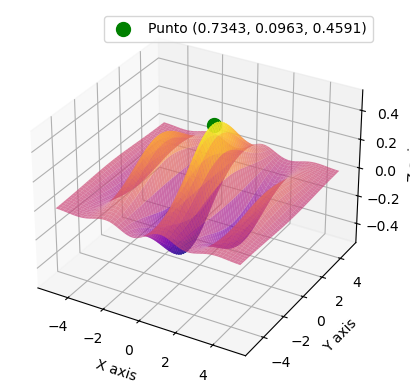

In [90]:
#c. 
import numpy as np
import matplotlib.pyplot as plt



# Generar datos de x y y en el rango de -100 a 100
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)

# Definir la función f(x, y) = (x - a)^2 + (y - b)^2
z = np.exp(-0.1*(x**2+y**2))*np.cos(x)*np.sin(x)

# Crear el gráfico 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# Cambiar el ángulo de visión
# ax.view_init(elev=5, azim=10)
# Crear la superficie
ax.plot_surface(x, y, z, cmap='plasma', alpha=0.7)
# Definir un punto
punto_x, punto_y = gbest_mean3_1
punto_z = gbest_fit_mean3_1
# Graficar el punto
ax.scatter(punto_x, punto_y, punto_z, color='green', s=100, label=f'Punto ({punto_x:.4f}, {punto_y:.4f}, {punto_z:.4f})')

# Etiquetas de los ejes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()

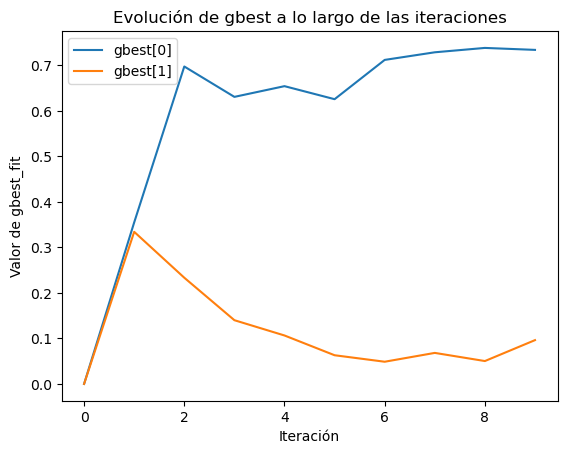

In [91]:
# #d.

plt.plot(range(max_iterations), gbest_history_mean3_1[:,0], label='gbest[0]')
plt.plot(range(max_iterations), gbest_history_mean3_1[:,1], label='gbest[1]')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest_fit')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()


In [92]:
# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.  # Factor de inercia

all_histories3_2 = []
gbest_final_positions3_2 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits3_2 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest3_2, gbest_fit3_2, gbest_history3_2 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories3_2.append(gbest_history3_2)
    gbest_final_positions3_2.append(gbest3_2)  # Guardar la mejor posición final
    gbest_final_fits3_2.append(gbest_fit3_2)  # Guardar la mejor aptitud final
    
gbest_mean3_2 = np.mean(gbest_final_positions3_2, axis=0)
gbest_fit_mean3_2 = np.mean(gbest_final_fits3_2)
gbest_history_mean3_2 = np.mean(all_histories3_2, axis=0)

Mejor solucion: [0.7561, -0.0772]
Valor optimo: 0.47112623463226155
Mejor solucion: [0.7463, 0.0528]
Valor optimo: 0.47133667851557837
Mejor solucion: [0.7261, 0.7414]
Valor optimo: 0.44579826085854307
Mejor solucion: [0.6993, 0.9744]
Valor optimo: 0.4266106337607479
Mejor solucion: [0.7098, 0.1802]
Valor optimo: 0.46848475092662617
Mejor solucion: [0.7615, 0.2248]
Valor optimo: 0.4689139361605933
Mejor solucion: [0.7106, 0.0539]
Valor optimo: 0.46993390338348545
Mejor solucion: [0.6968, 0.1610]
Valor optimo: 0.46762824000914355
Mejor solucion: [0.7474, -0.0029]
Valor optimo: 0.47147031504440484
Mejor solucion: [0.7437, 0.0052]
Valor optimo: 0.4714509778889499
Mejor solucion: [0.7551, -0.0077]
Valor optimo: 0.4714189378721637
Mejor solucion: [0.7122, -0.0685]
Valor optimo: 0.4699684128772223
Mejor solucion: [0.7321, 0.4771]
Valor optimo: 0.46061179478220693
Mejor solucion: [0.7351, 0.0622]
Valor optimo: 0.4711213994103856
Mejor solucion: [0.7486, -0.0055]
Valor optimo: 0.47146943500135

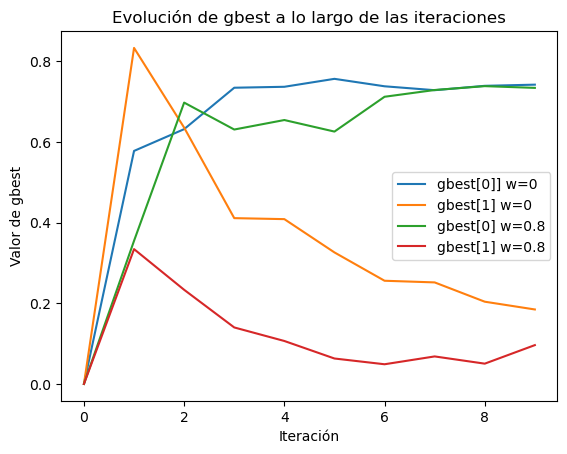

In [93]:
plt.plot(range(max_iterations), gbest_history_mean3_2[:,0], label='gbest[0]] w=0')
plt.plot(range(max_iterations), gbest_history_mean3_2[:,1], label='gbest[1] w=0')
plt.plot(range(max_iterations), gbest_history_mean3_1[:,0], label='gbest[0] w=0.8')
plt.plot(range(max_iterations), gbest_history_mean3_1[:,1], label='gbest[1] w=0.8')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest')
plt.title('Evolución de gbest a lo largo de las iteraciones')
plt.legend()
plt.show()

In [94]:
# # parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 10  # numero máximo de iteraciones para la optimizacion
times2run = 30
c1 = 2
c2 = 2  # coeficientes de aceleracion
w = 0.5# Factor de inercia

all_histories3_3 = []
gbest_final_positions3_3 = []  # Para guardar el gbest de cada ejecución
gbest_final_fits3_3 = []  # Para guardar el gbest_fit de cada ejecución

for i in range(times2run):
    gbest3_3, gbest_fit3_3, gbest_history3_3 = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w, f, g1, g2)
    all_histories3_3.append(gbest_history3_3)
    gbest_final_positions3_3.append(gbest3_3)  # Guardar la mejor posición final
    gbest_final_fits3_3.append(gbest_fit3_3)  # Guardar la mejor aptitud final
    
gbest_mean3_3 = np.mean(gbest_final_positions3_3, axis=0)
gbest_fit_mean3_3 = np.mean(gbest_final_fits3_3)
gbest_history_mean3_3 = np.mean(all_histories3_3, axis=0)

Mejor solucion: [0.7610, 0.1794]
Valor optimo: 0.46979142798397905
Mejor solucion: [0.7221, 0.0968]
Valor optimo: 0.47035568794632543
Mejor solucion: [0.6781, 0.3817]
Valor optimo: 0.45981935424659204
Mejor solucion: [0.7186, 0.2706]
Valor optimo: 0.4671701119304102
Mejor solucion: [0.7265, 0.1043]
Valor optimo: 0.4704934633480783
Mejor solucion: [0.7247, 0.0515]
Valor optimo: 0.47080165927681583
Mejor solucion: [0.6957, 0.2780]
Valor optimo: 0.46512240164800606
Mejor solucion: [0.7258, 0.1275]
Valor optimo: 0.4702112202397054
Mejor solucion: [0.7034, 0.8045]
Valor optimo: 0.44005559740387634
Mejor solucion: [0.7213, -0.1115]
Valor optimo: 0.4701695680277482
Mejor solucion: [0.7218, -0.1969]
Valor optimo: 0.4689605220648624
Mejor solucion: [0.7511, -0.0996]
Valor optimo: 0.4709944173775376
Mejor solucion: [0.7596, -0.0424]
Valor optimo: 0.47125504123145245
Mejor solucion: [0.7271, 0.3231]
Valor optimo: 0.4661423662677293
Mejor solucion: [0.6947, 0.8731]
Valor optimo: 0.4342242496797623

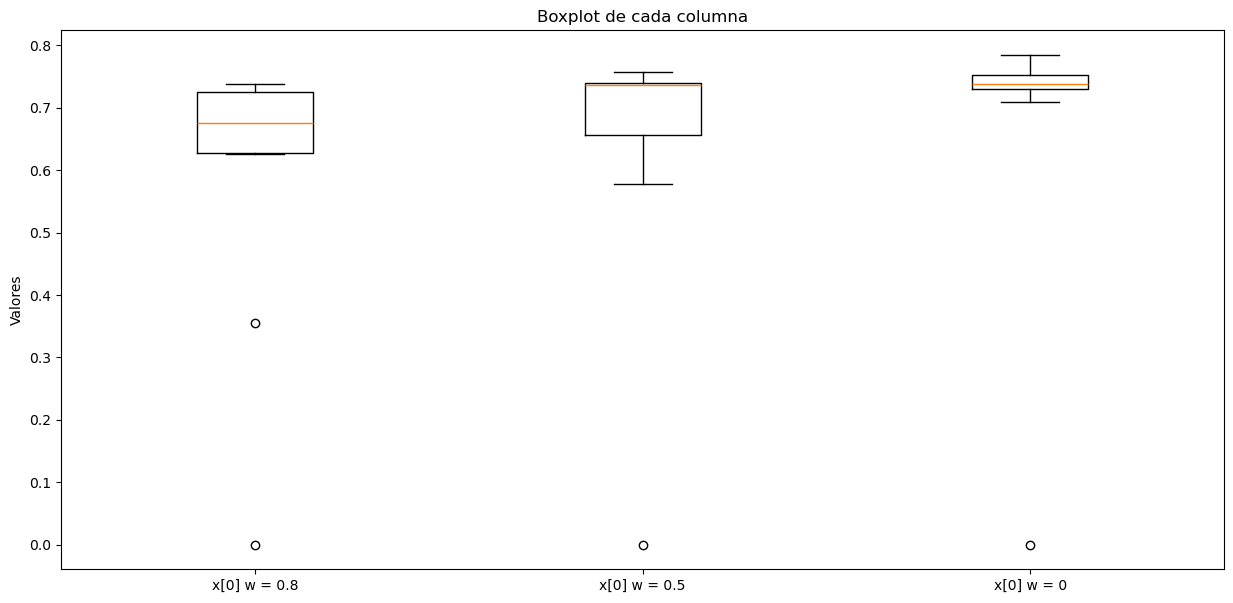

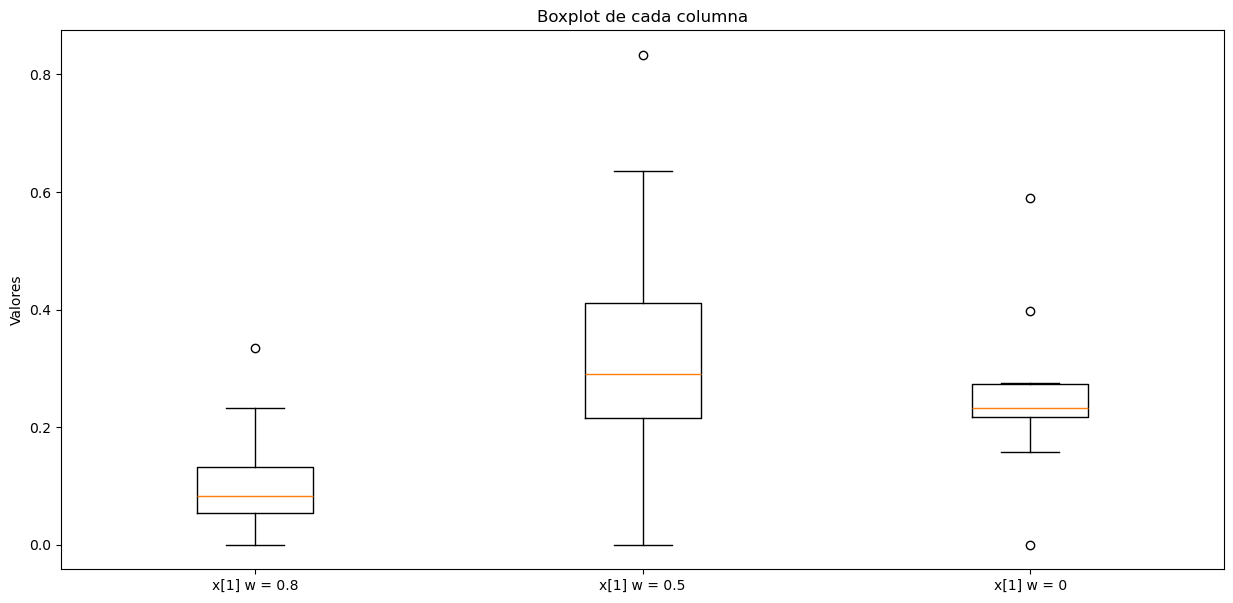

In [95]:

fig = plt.figure(figsize =(15, 7))
plt.boxplot([gbest_history_mean3_1[:,0], gbest_history_mean3_2[:,0], gbest_history_mean3_3[:,0]], labels=["x[0] w = 0.8", "x[0] w = 0.5", "x[0] w = 0"])
plt.title("Boxplot de cada columna")
plt.ylabel("Valores")

plt.show()
fig2 = plt.figure(figsize =(15, 7))
plt.boxplot([gbest_history_mean3_1[:,1], gbest_history_mean3_2[:,1], gbest_history_mean3_3[:,1]], labels=["x[1] w = 0.8", "x[1] w = 0.5", "x[1] w = 0"])
plt.title("Boxplot de cada columna")
plt.ylabel("Valores")

plt.show()

Para la variable x[0] las tres columnas muestran una distribución similar, con una ligera tendencia a valores más altos en las columnas x[0] w = 0.8 y x[0] w = 0.5. Sin embargo, la columna x[0] w = 0 presenta una mayor variabilidad en los datos.

Para la variable x[1] la columna x[1] w = 0.5 muestra la mayor variabilidad en los datos, mientras que las columnas x[1] w = 0.8 y x[1] w = 0 presentan una distribución más concentrada en la parte inferior del rango.


## Ejercicio 4

Resolver con PSO el siguiente sistema de ecuaciones:

 $$
\begin{cases}
3x + 2y = 9 \\
x - 5y = 4
\end{cases}
$$

Hay que construir una función de aptitud que mida qué tan cerca están las partículas de satisfacer ambas ecuaciones. 

Esta funcion aptitud sera la sima de los cuadrados de cada ecuacion:

$$
aptitud(x,y)=(3x + 2y - 9)^2 + (x - 5y - 4)^2
$$

Luego se minimiza esa funcion utilizando el algoritmo PSO

Primero se hara un grafico de ambas funciones para ver aproximadamente donde se cruzan para saber que restricciones ponerle al algoritmo

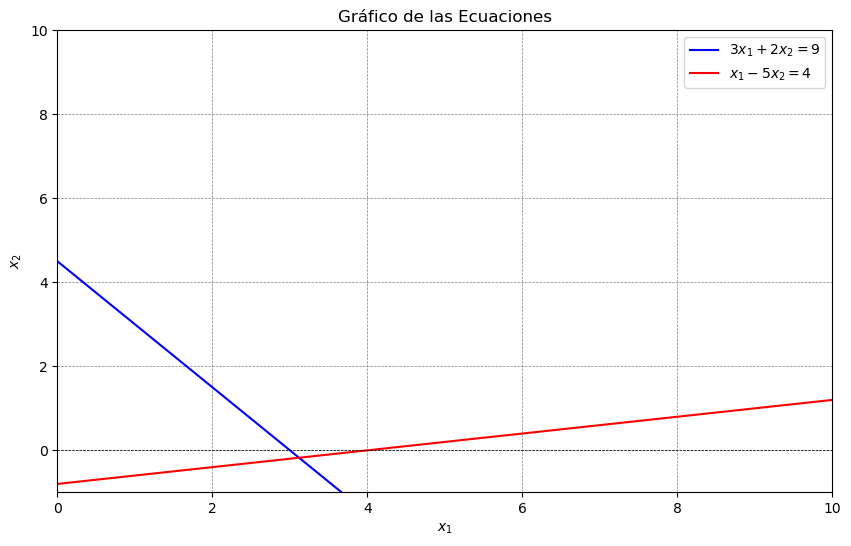

In [96]:
# Definir las ecuaciones
def f1(x1):
    return (9 - 3 * x1) / 2

def f2(x1):
    return (x1 - 4) / 5

# Crear un rango de valores para x1
x1_values = np.linspace(0, 10, 200)
x2_values_eq1 = f1(x1_values)
x2_values_eq2 = f2(x1_values)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x1_values, x2_values_eq1, label=r'$3x_1 + 2x_2 = 9$', color='blue')
plt.plot(x1_values, x2_values_eq2, label=r'$x_1 - 5x_2 = 4$', color='red')
plt.xlim(0, 10)
plt.ylim(-1, 10)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Gráfico de las Ecuaciones')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

Como se puede ver, las rectas se cortan entre 2 y 4 en x1 y entre 0 y -2 en x2 por lo tanto ahi se pondran las restricciones

In [97]:
def funcion_objetivo(x):
    # sistema de ecuaciones
    f1 = 3*x[0]+2*x[1]-9
    f2 = x[0] - 5*x[1] -4
    
    # devuelvo la funcion aptitud que es la suma de los errores cuadrados de cada ecuacion
    return f1**2 + f2**2


In [98]:
from pyswarm import pso

lb = [2, -2]  # limite inf
ub = [4, 0]  # limite sup

# parametros
n_particles = 20  # numero de particulas en el enjambre
n_dimensions = 2  # dimensiones del espacio de busqueda (x1 y x2)
max_iterations = 15  # numero máximo de iteraciones para la optimizacion
historial_gbest = []

# Llamada a la función pso
solucion_optima, valor_optimo= pso(funcion_objetivo, lb, ub, swarmsize=n_particles, maxiter=max_iterations, debug=True, omega=0.5)

# Resultados
print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

No constraints given.
Best after iteration 1: [ 2.91956129 -0.01075456] 1.1231199769928162
New best for swarm at iteration 2: [3.0661992 0.       ] 0.9114249375854444
Best after iteration 2: [3.0661992 0.       ] 0.9114249375854444
New best for swarm at iteration 3: [ 3.11866698 -0.18476802] 0.0019900529057321334
Best after iteration 3: [ 3.11866698 -0.18476802] 0.0019900529057321334
Best after iteration 4: [ 3.11866698 -0.18476802] 0.0019900529057321334
Best after iteration 5: [ 3.11866698 -0.18476802] 0.0019900529057321334
Best after iteration 6: [ 3.11866698 -0.18476802] 0.0019900529057321334
Best after iteration 7: [ 3.11866698 -0.18476802] 0.0019900529057321334
New best for swarm at iteration 8: [ 3.11666152 -0.17721991] 2.747297575501124e-05
Best after iteration 8: [ 3.11666152 -0.17721991] 2.747297575501124e-05
Best after iteration 9: [ 3.11666152 -0.17721991] 2.747297575501124e-05
Best after iteration 10: [ 3.11666152 -0.17721991] 2.747297575501124e-05
Best after iteration 11: 

Se podria